In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Importing the data

In [2]:
# importing the data from URL which was provided

url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Visualizing the Data

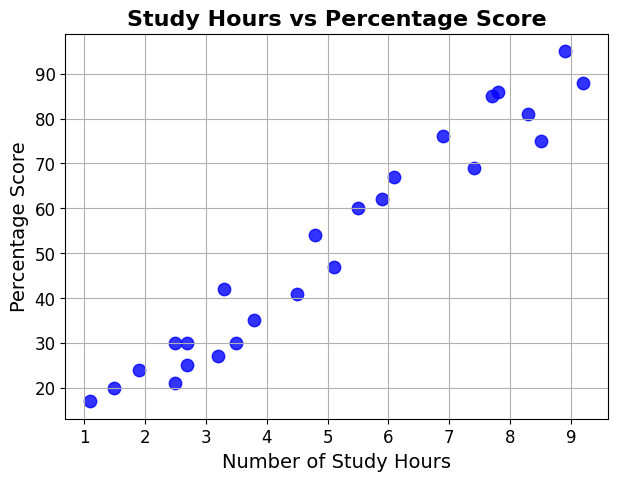

In [4]:
plt.figure(figsize=(7, 5))  # Set figure size

plt.scatter(df['Hours'], df['Scores'], color='blue', marker='o', s=80, alpha=0.8)
plt.xlabel('Number of Study Hours', fontsize=14)
plt.ylabel('Percentage Score', fontsize=14) 
plt.title('Study Hours vs Percentage Score', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.grid(True) 
plt.show()


### Splitting data into input features (X) and target variable (y)

In [5]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values

# Split data into training and testing sets -> 80/20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


### Creating Linear Regression Model and applying on data splits

In [6]:
# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the percentage scores for the test data
y_pred = model.predict(X_test)


### Calculate MSE and R-squared values

In [7]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE) -> ', mse)
print('Coefficient of Determination (R-squared) -> ', r2)


Mean Squared Error (MSE) ->  21.598769307217406
Coefficient of Determination (R-squared) ->  0.9454906892105355


In [8]:
# Predict the percentage score for 9.25 hours/day
hours = 9.25
prediction = model.predict([[hours]])
print('Predicted Percentage Score for 9.25 hours/day of study is -> ', prediction[0])


Predicted Percentage Score for 9.25 hours/day of study is ->  93.69173248737535


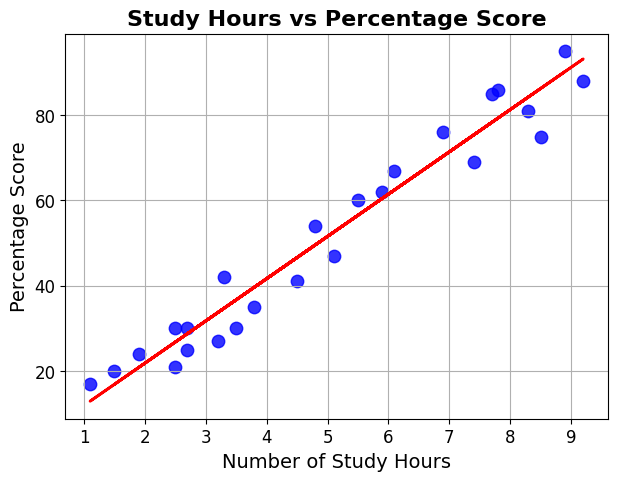

In [9]:
# Plot the results

plt.figure(figsize=(7, 5))
plt.scatter(X, Y, color='blue', marker='o', s=80, alpha=0.8)
plt.xlabel('Number of Study Hours', fontsize=14) 
plt.ylabel('Percentage Score', fontsize=14) 
plt.title('Study Hours vs Percentage Score', fontsize=16, fontweight='bold') 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


regression_line = np.squeeze(model.coef_) * X + np.squeeze(model.intercept_)
plt.plot(X, regression_line, color='red', linewidth=2, label='Regression Line')
plt.grid(True)
plt.show()
